# 1D heat conduction equation

Modeling heat conduction is a ubiquitous task in engineering, and one main approach is to use the [**diffusion equation**](https://en.wikipedia.org/wiki/Diffusion_equation) (of which the heat equation is a special case, for constant diffusivity), a second-order partial differential equation.
Here we will showcase an example in 1 dimension, where $x$ is the only position variable.

## Summary of commands

In this exercise, we will demonstrate the following:
- Masking of indices.
  That is, if `x = [1, 3, 5, 4, 2]`, then `x > 2` produces the Boolean array `[False, True, True, True, False]`.
  It is useful for indexing into NumPy arrays based on certain conditions for other arrays.

## Demo

The temperature of the ends of a rod with length $3$ is heated such that

$$ T(x,0) = \begin{cases} x & 0 \le x \le \dfrac{3}{2} \\ 3 - x & \dfrac{3}{2} \le x \le 3 \end{cases}. $$

The ends of the rod are then connected to insulators to maintain the ends at $T(0,t) = 0$ and $T(3,t)=0$.
The solution to the heat conduction equation $\lambda \dfrac{\partial^2 T}{\partial x^2} = \dfrac{\partial T}{\partial t}$ with $\lambda=1$, is:

$$ \begin{align*}
T(x,t) &= \sum_{n=1,5,9,\dots}^{\infty} \dfrac{4}{n^2 \pi^2} \sin \left( \dfrac{n\pi x}{3} \right) e^{-\frac{n^2 \pi^2}{9}t} \\
T(x,t) &= \sum_{n=3,7,11,\dots}^{\infty} -\dfrac{4}{n^2 \pi^2} \sin \left( \dfrac{n\pi x}{3} \right) e^{-\frac{n^2 \pi^2}{9}t}
\end{align*} $$

Plot the temperature distribution of the rod at $t = 0$, $0.1$, $1$, $3$, and $10$.

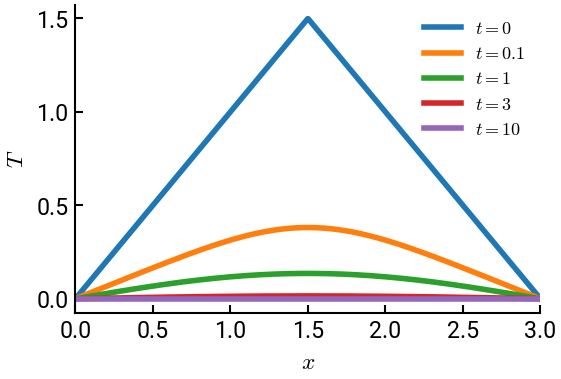

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# constants
nmax = 11
x = np.linspace(0, 3, 1000)
ts = [0, 0.1, 1, 3, 10]

fig, ax = plt.subplots()
for t in ts:
    T = np.zeros(x.shape)
    if t == 0:     # initial condition
        T[x < 3/2] = x[x < 3/2]
        T[x > 3/2] = 3 - x[x > 3/2]
    else:          # all other cases - Note the two loops!
        for n in np.arange(1, nmax, 4):
            Bn = 4 / (n**2 * np.pi**2)
            T += Bn * np.sin(n * np.pi * x / 3) * np.exp(-n**2 * np.pi**2 / 9 * t)
        for n in np.arange(3, nmax, 4):
            Bn = -4 / (n**2 * np.pi**2)
            T += Bn * np.sin(n * np.pi * x / 3) * np.exp(-n**2 * np.pi**2 / 9 * t)
    ax.plot(x, T, label=f"$t={t}$")
ax.set(xlabel='$x$', ylabel='$T$', xlim=[0,3])
ax.legend(fontsize=13)
plt.show()